In [18]:
import wandb
import pandas as pd
api = wandb.Api()

runs = api.runs("lucashsmello/finetunning_vibnet", filters={'group':'Feb10_09-53-57'})

# if run.state == "finished":
#     for i, row in run.history().iterrows():
#       print(row["_timestamp"], row["accuracy"])

In [77]:
from tqdm import tqdm

valid_configs = ['domain_balance_mode', 'net_param__module', 'net_param__optimizer__lr', 'net_param__criterion__margin',
                 'net_param__module__encode_size', 'source_datasets']
valid_keys_hist = ['valid/f1_macro_cwru', 'valid/f1_macro_mfpt',
                   'valid/f1_macro_rpdbcs', 'valid/f1_macro_pu', 'train/loss', 'valid/loss']

valid_keys_hist_max = ["%s_max" % k for k in valid_keys_hist]
valid_keys_hist_last = ["%s_last" % k for k in valid_keys_hist]
valid_keys_hist_min = ["%s_min" % k for k in valid_keys_hist]


data = []
# summary_list, config_list, name_list = [], [], [], []
for run in tqdm(runs):
    d = []
    if run.state != "finished":
        continue
    if('domain_balance_mode' not in run.config):
        continue
    hist = run.history()
    if(len(hist) == 0):
        continue

    d += [run.config[vc] for vc in valid_configs]
    d += [hist[vh].max() for vh in valid_keys_hist]
    d += [hist[vh].iloc[-1] for vh in valid_keys_hist]
    d += [hist[vh].min() for vh in valid_keys_hist]
    d += [run.name]
    data.append(d)

runs_df = pd.DataFrame(data, columns=valid_configs +
                       valid_keys_hist_max+valid_keys_hist_last + valid_keys_hist_min
                       + ['name'])

100%|██████████| 84/84 [00:33<00:00,  2.53it/s]


In [78]:
runs_df = runs_df.rename({c:c.replace('net_param__','') for c in runs_df.columns},axis=1)
runs_df

,domain_balance_mode,module,optimizer__lr,criterion__margin,module__encode_size,source_datasets,valid/f1_macro_cwru_max,valid/f1_macro_mfpt_max,valid/f1_macro_rpdbcs_max,valid/f1_macro_pu_max,...,valid/f1_macro_pu_last,train/loss_last,valid/loss_last,valid/f1_macro_cwru_min,valid/f1_macro_mfpt_min,valid/f1_macro_rpdbcs_min,valid/f1_macro_pu_min,train/loss_min,valid/loss_min,name
0,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,48,cwru+pu+rpdbcs,0.767064,1.0,0.722916,0.990912,...,0.982883,0.000573,0.012288,0.547102,0.952137,0.382685,0.937585,0.000573,0.010772,polished-surf-619
1,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,32,cwru+pu+rpdbcs,0.749177,1.0,0.830848,0.992928,...,0.988680,0.000793,0.009726,0.524181,0.947452,0.600337,0.864410,0.000638,0.006446,deep-sunset-618
2,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,24,cwru+pu+rpdbcs,0.781213,1.0,0.759065,0.987235,...,NaN,NaN,NaN,0.426506,0.971680,0.521047,0.884603,0.000865,0.015205,vocal-snowball-617
3,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,20,cwru+pu+rpdbcs,0.879927,1.0,0.788312,0.991999,...,NaN,NaN,NaN,0.645655,0.947412,0.561558,0.919337,0.000568,0.011862,easy-fog-616
4,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,16,cwru+pu+rpdbcs,0.879199,1.0,0.811154,0.993975,...,0.992410,0.000370,0.014641,0.612541,0.950418,0.526877,0.912018,0.000370,0.012045,upbeat-bush-615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,24,cwru+pu+rpdbcs,0.718617,1.0,0.857035,0.992303,...,0.985967,0.000637,0.012267,0.419508,0.944824,0.526906,0.932148,0.000386,0.007961,visionary-spaceship-556
59,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,20,cwru+pu+rpdbcs,0.652654,1.0,0.841582,0.992783,...,0.989270,0.001005,0.009838,0.426493,0.918200,0.551677,0.906688,0.000413,0.009526,noble-dream-555
60,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,16,cwru+pu+rpdbcs,0.663212,1.0,0.870220,0.993935,...,0.982493,0.000642,0.010031,0.386187,0.904281,0.518679,0.911225,0.000589,0.007639,valiant-snowball-554
61,loss,benchmarks.RPDBCS.experiment_vibnet.MetricNet,0.001,0.5,12,cwru+pu+rpdbcs,0.703277,1.0,0.852589,0.996280,...,0.994209,0.000936,0.010557,0.444484,0.915410,0.529595,0.915494,0.000555,0.009444,dashing-snowball-553


In [41]:
runs_df['source_datasets'].unique()

array(['cwru+pu+rpdbcs', 'mfpt+cwru+pu', 'mfpt+cwru+rpdbcs',
       'mfpt+pu+rpdbcs'], dtype=object)

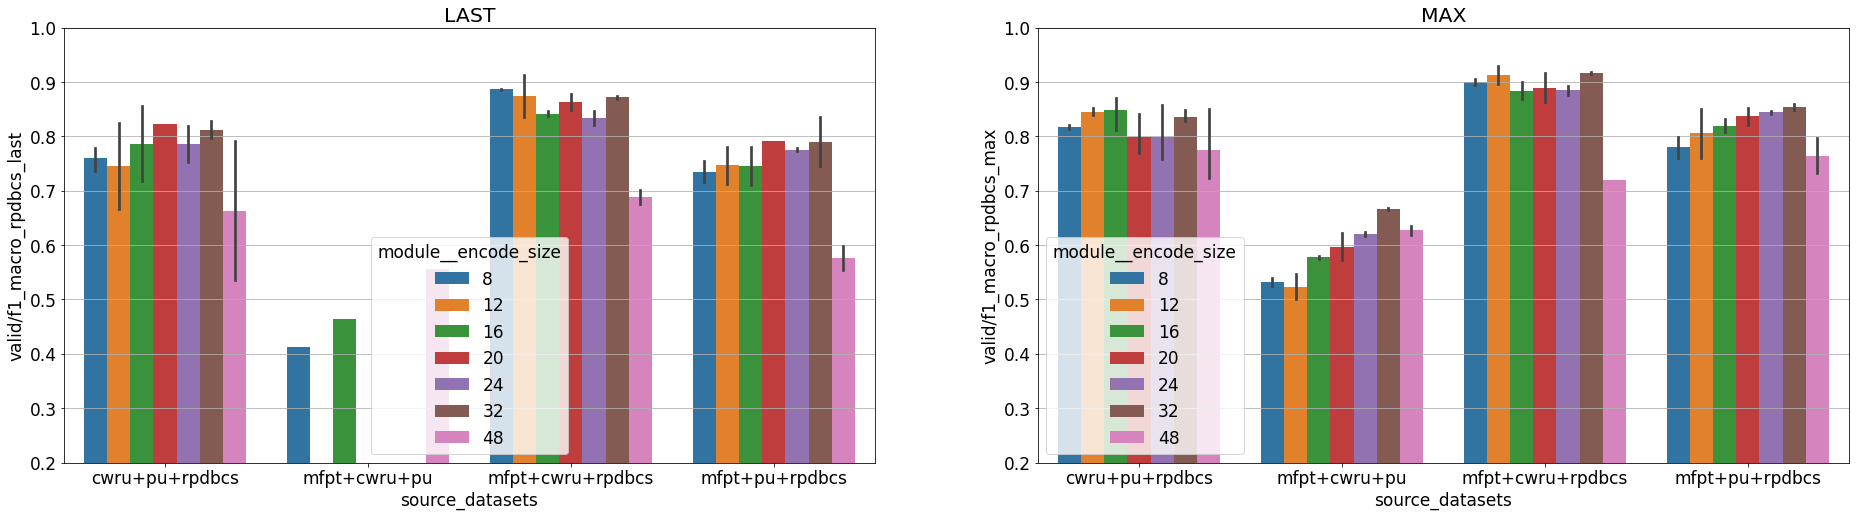

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 17

_, (ax1,ax2) = plt.subplots(1, 2, figsize=(32, 8))
# for k,source_datasets in enumerate(runs_df['source_datasets'].unique()):
sns.barplot(data=runs_df, hue='module__encode_size', y='valid/f1_macro_rpdbcs_last', x='source_datasets',ax=ax1)
ax1.set_ylim([0.2, 1.0])
ax1.grid(axis='y');
ax1.set_title('LAST');

sns.barplot(data=runs_df, hue='module__encode_size', y='valid/f1_macro_rpdbcs_max', x='source_datasets',ax=ax2)
ax2.set_ylim([0.2, 1.0])
ax2.grid(axis='y');
ax2.set_title('MAX');

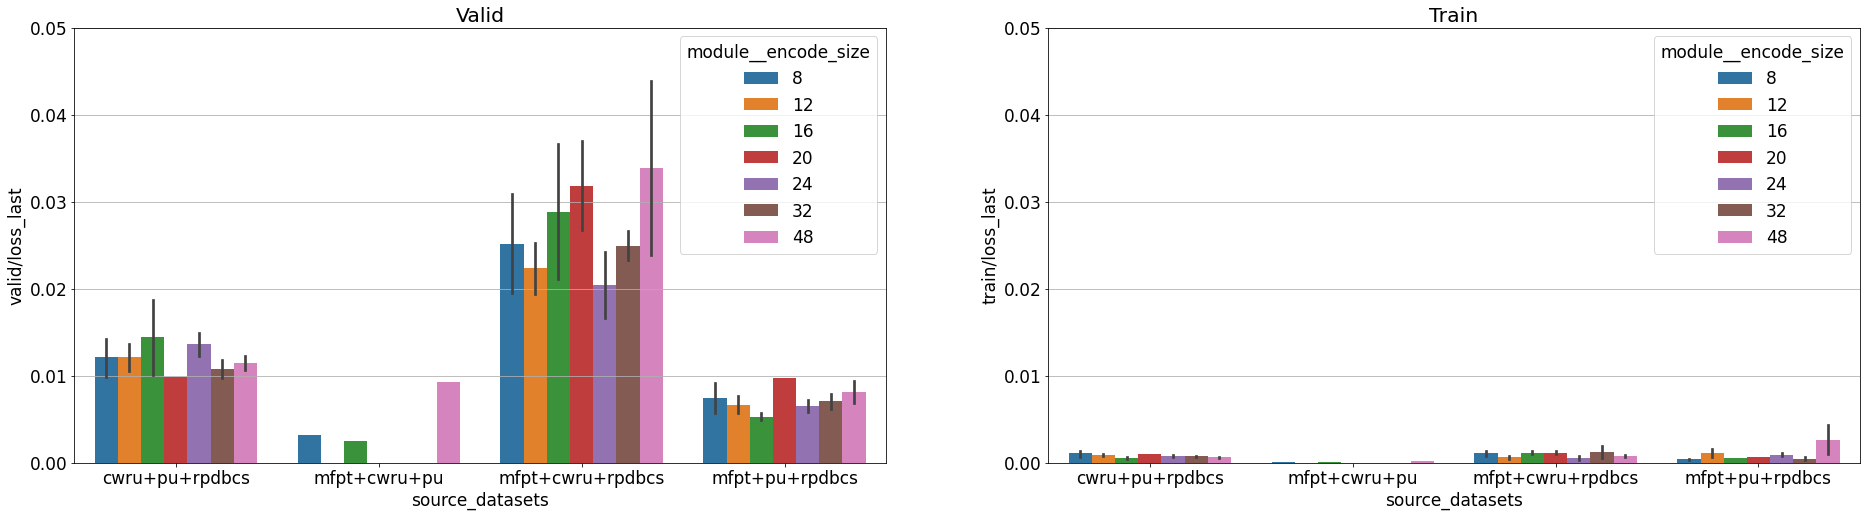

In [84]:
_, (ax1,ax2) = plt.subplots(1, 2, figsize=(32, 8))
# for k,source_datasets in enumerate(runs_df['source_datasets'].unique()):
sns.barplot(data=runs_df, hue='module__encode_size', y='valid/loss_last', x='source_datasets',ax=ax1)
ax1.set_ylim([0.0, 0.05])
ax1.grid(axis='y');
ax1.set_title('Valid');

# for k,source_datasets in enumerate(runs_df['source_datasets'].unique()):
sns.barplot(data=runs_df, hue='module__encode_size', y='train/loss_last', x='source_datasets',ax=ax2)
ax2.set_ylim([0.0, 0.05])
ax2.grid(axis='y');
ax2.set_title('Train');


- PU reduz muito o loss
- aumentar encode_size aumenta overfitting. 

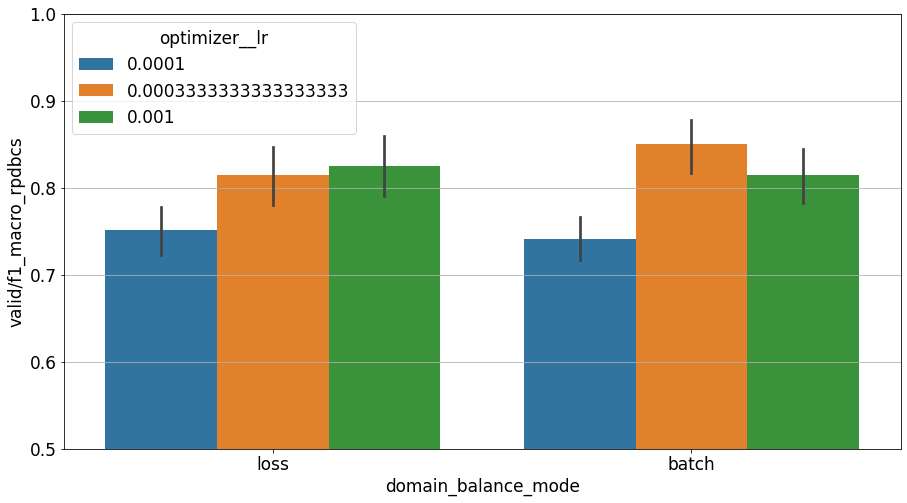

In [61]:
sns.barplot(data=runs_df,x='domain_balance_mode',y='valid/f1_macro_rpdbcs', hue='optimizer__lr');
plt.ylim([0.5,1.0]);
plt.grid(axis='y')

O gráfico acima, apresenta esse mesmo padrão se rodado várias vezes: modo `batch` com `lr=1e-3/3` é melhor mesmo.

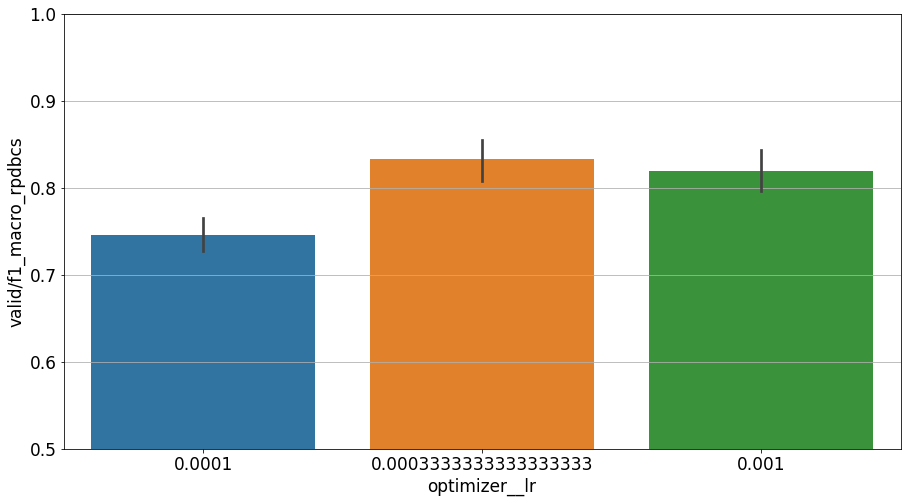

In [59]:
sns.barplot(data=runs_df,y='valid/f1_macro_rpdbcs', x='optimizer__lr');
plt.ylim([0.5,1.0]);
plt.grid(axis='y')

O `lr=1e-4` é certamente pior.